In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS (2).csv


importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading the file

In [ ]:
data_file = pd.read_csv("weatherAUS.csv")
df = data_file.copy()

knowing some info about the data

In [ ]:
df.info()
total_nulls = df.isnull().sum().sum()
print(f"total nulls in the data = {total_nulls}")
print(f"the shape of the data is: {df.shape}")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,16.990631,21.68339
std,6.398495,7.119049,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,40.200000,46.70000


'RainTomorrow' col

In [ ]:
bal_or_no = df["RainTomorrow"].value_counts()
print(bal_or_no) # the data is imbalanced
print(f"the missing values in target colum = {df['RainTomorrow'].isna().sum()}") # 3267
df = df.dropna(subset=["RainTomorrow"]) # to be removed

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64
the missing values in target colum = 3267


Handling 'Date' col

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfYear'] = df['Date'].dt.dayofyear

showing boxplot for each numerical col

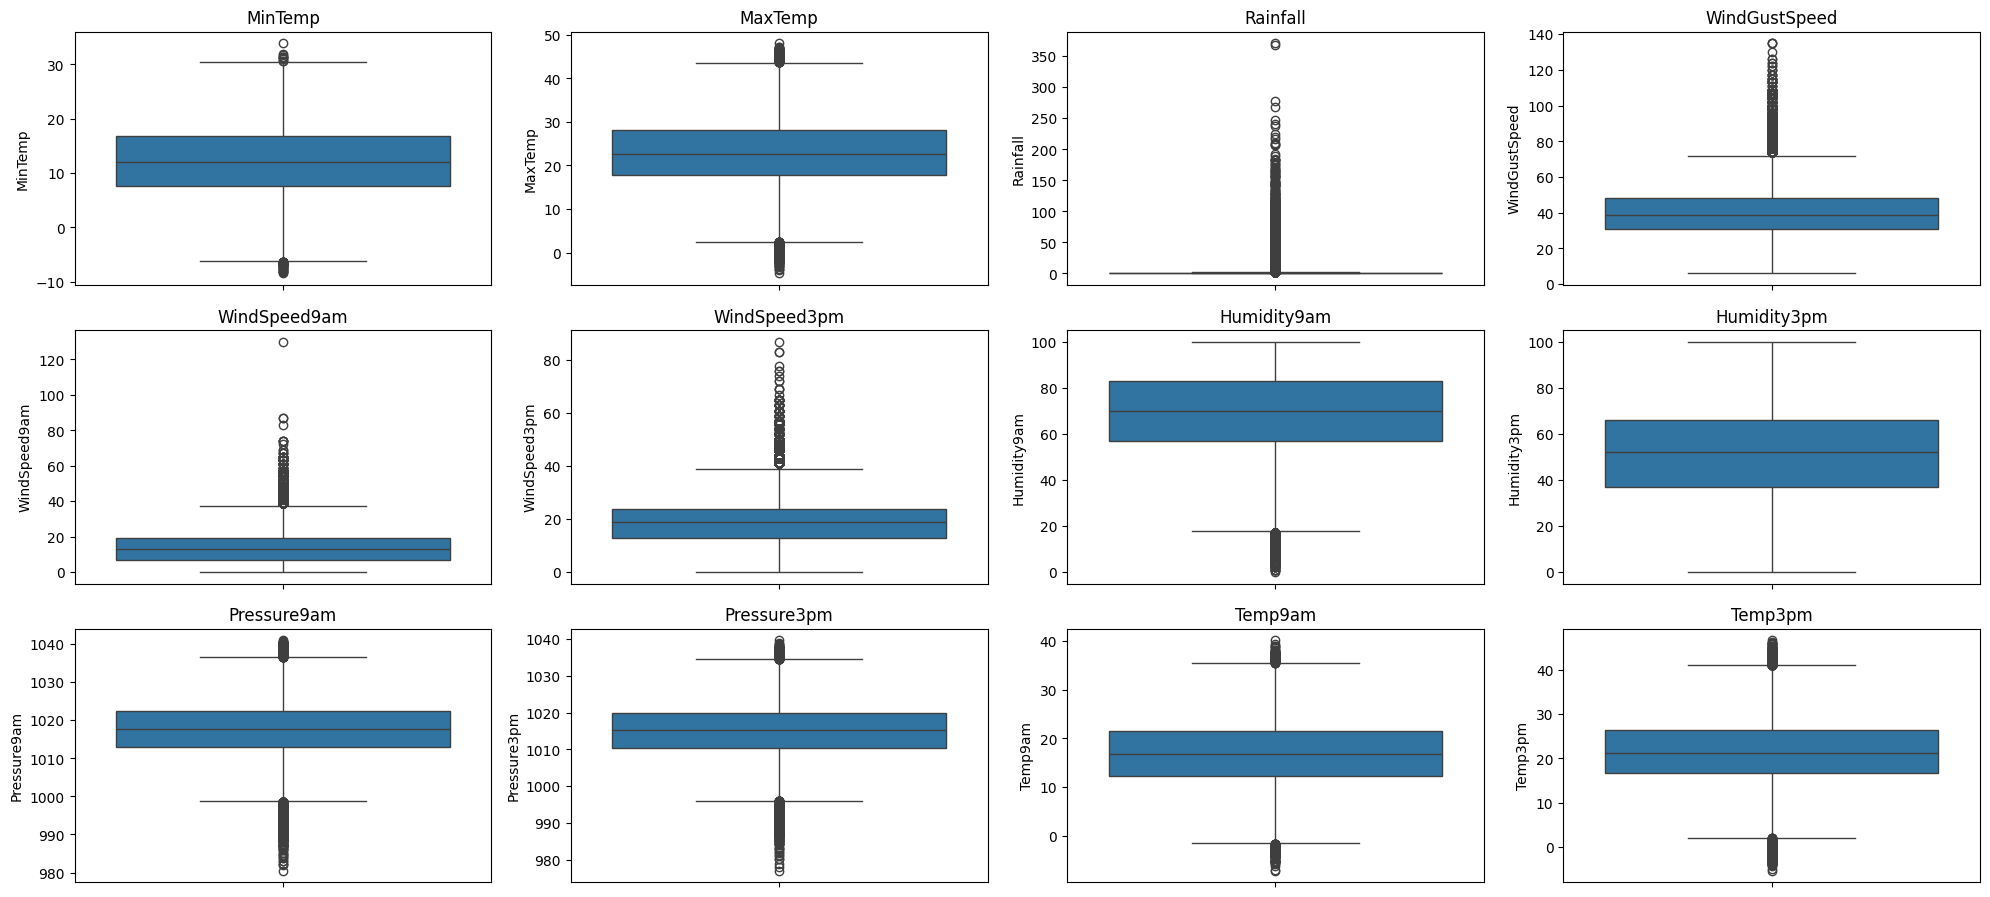

In [ ]:
numerical_cols = df.select_dtypes(include=['float64']).columns.tolist()
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

encoding the cols

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if 'RainTomorrow' in categorical_cols:
    categorical_cols.remove('RainTomorrow')
if 'RainToday' in categorical_cols:
    categorical_cols.remove('RainToday')

for col in numerical_cols:
  df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainToday'] = LabelEncoder().fit_transform(df['RainToday'])
df['RainTomorrow'] = LabelEncoder().fit_transform(df['RainTomorrow'])

handling the outliers

In [ ]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_val = df[col].median()

    df[col] = np.where(df[col] < lower_bound, median_val, df[col])
    df[col] = np.where(df[col] > upper_bound, median_val, df[col])

adding new featuers

In [ ]:
df['TempRange'] = df['MaxTemp'] - df['MinTemp']
df['PressureDiff'] = df['Pressure9am'] - df['Pressure3pm']
df['HumidityIndex'] = (df['Humidity9am'] + df['Humidity3pm']) / 2
df['WindSpeedIndex'] = (df['WindSpeed9am'] + df['WindSpeed3pm']) / 2

nominal_cols = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

print(f"One-Hot Encoding complete. New shape: {df.shape}")
print("Missing values after cleaning:", df.isnull().sum().sum())

df.to_csv("weatherAUS_cleaned_final.csv", index=False) # saving in new file

One-Hot Encoding complete. New shape: (142193, 117)
Missing values after cleaning: 0


heatmap for most 20 featuers with the target

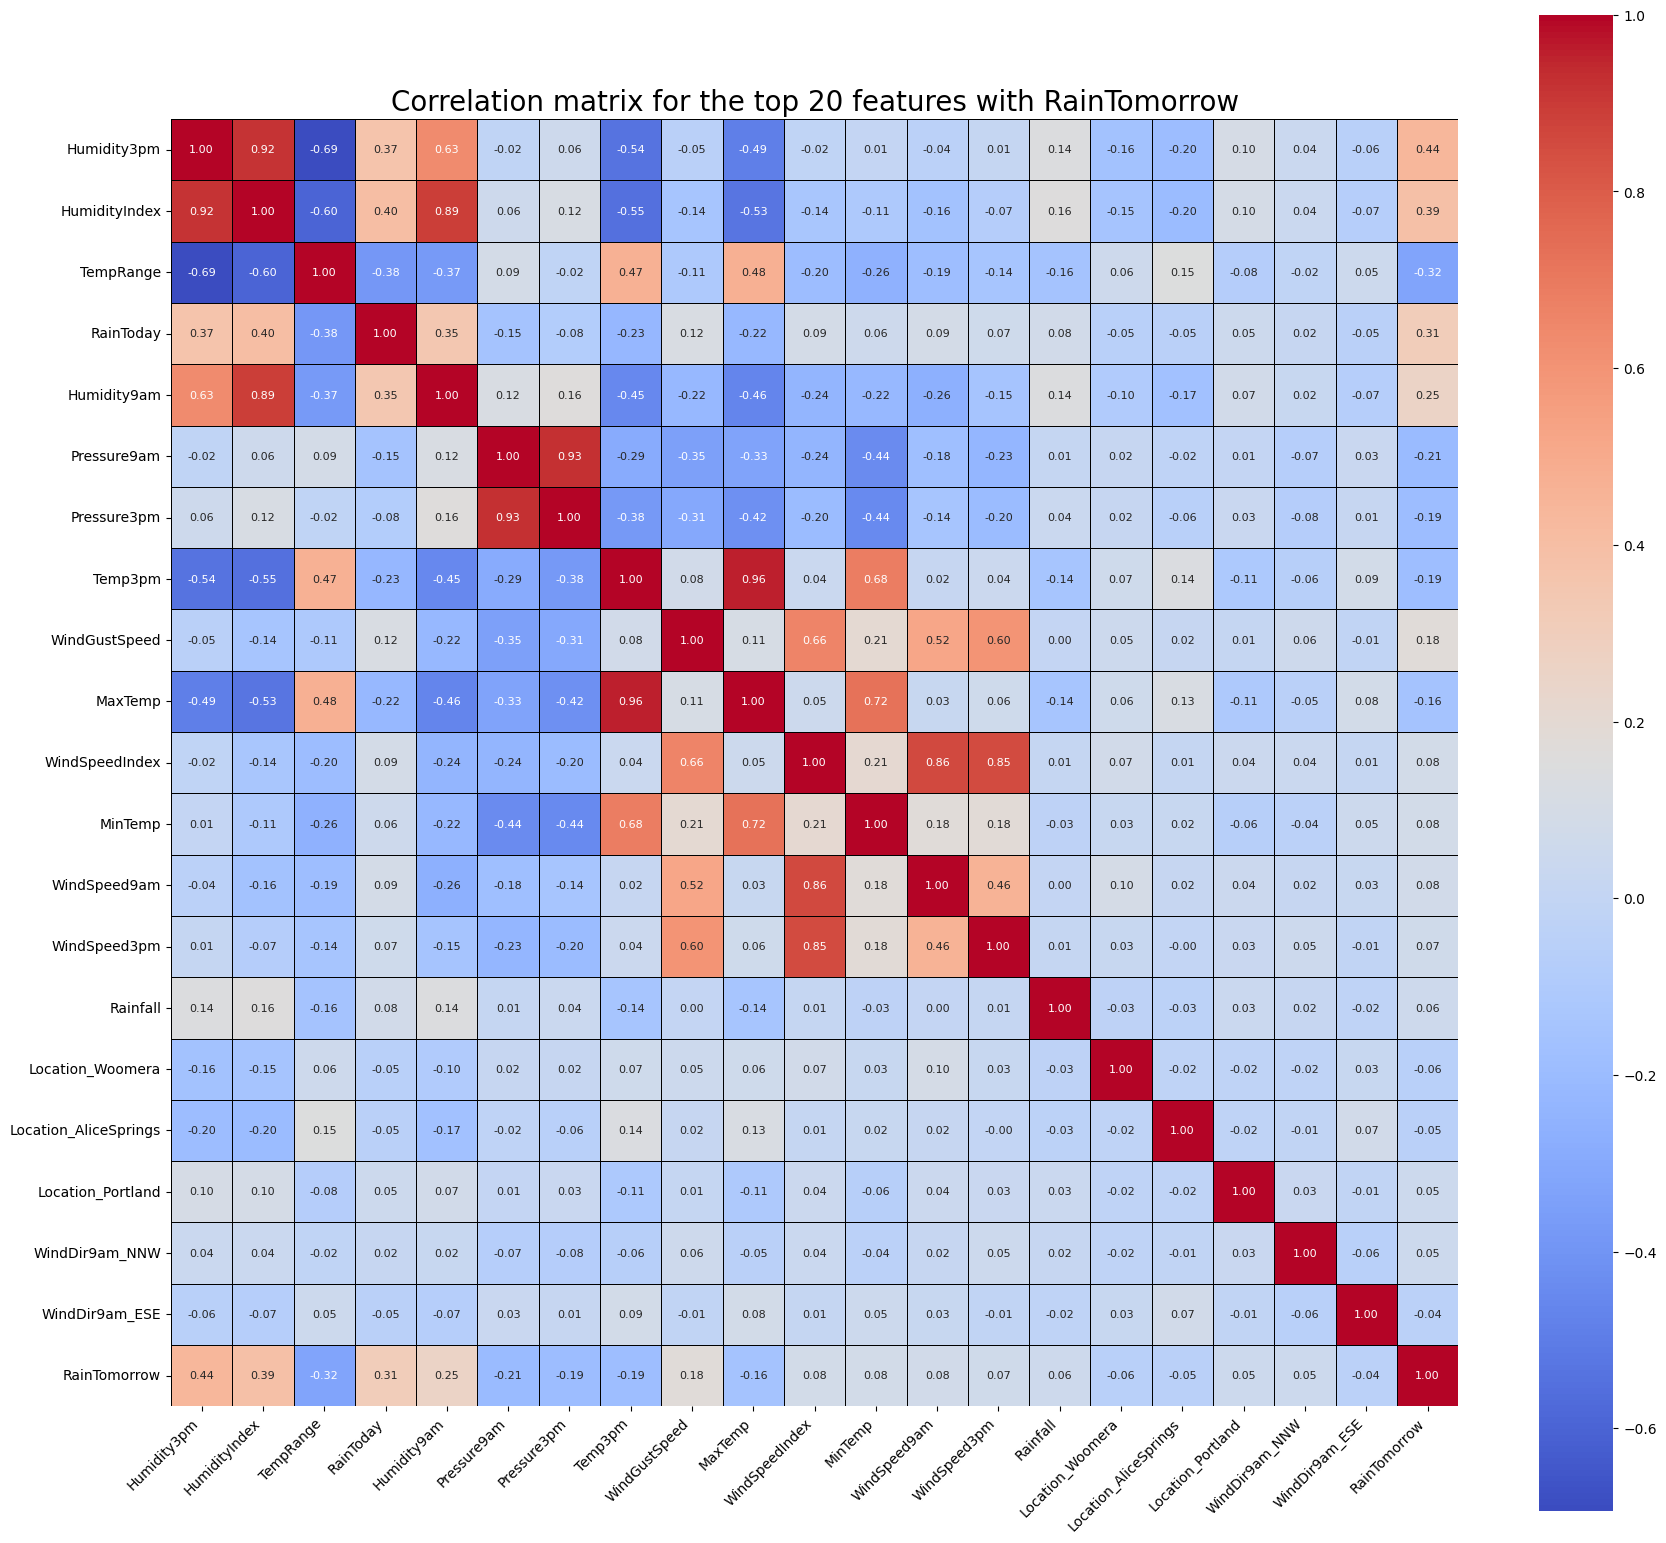

In [ ]:
heatmap_output_file = 'correlation_heatmap.png'

correlations = df.corr()['RainTomorrow'].drop('RainTomorrow', errors='ignore')

top_features = correlations.abs().sort_values(ascending=False).head(20).index.tolist()
heatmap_cols = top_features + ['RainTomorrow']
corr_matrix = df[heatmap_cols].corr()

plt.figure(figsize=(18, 16))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    linewidths=.5,
    linecolor='black',
    square=True,
    annot_kws={"size": 8}
)

plt.title('Correlation matrix for the top 20 features with RainTomorrow', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig(heatmap_output_file)

In [ ]:
print("\nThe top 20 features:")
for i, feature in enumerate(top_features):
    print(f"{i+1}. {feature}")


The top 20 features:
1. Humidity3pm
2. HumidityIndex
3. TempRange
4. RainToday
5. Humidity9am
6. Pressure9am
7. Pressure3pm
8. Temp3pm
9. WindGustSpeed
10. MaxTemp
11. WindSpeedIndex
12. MinTemp
13. WindSpeed9am
14. WindSpeed3pm
15. Rainfall
16. Location_Woomera
17. Location_AliceSprings
18. Location_Portland
19. WindDir9am_NNW
20. WindDir9am_ESE


/tmp/ipython-input-1363962128.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette="coolwarm")


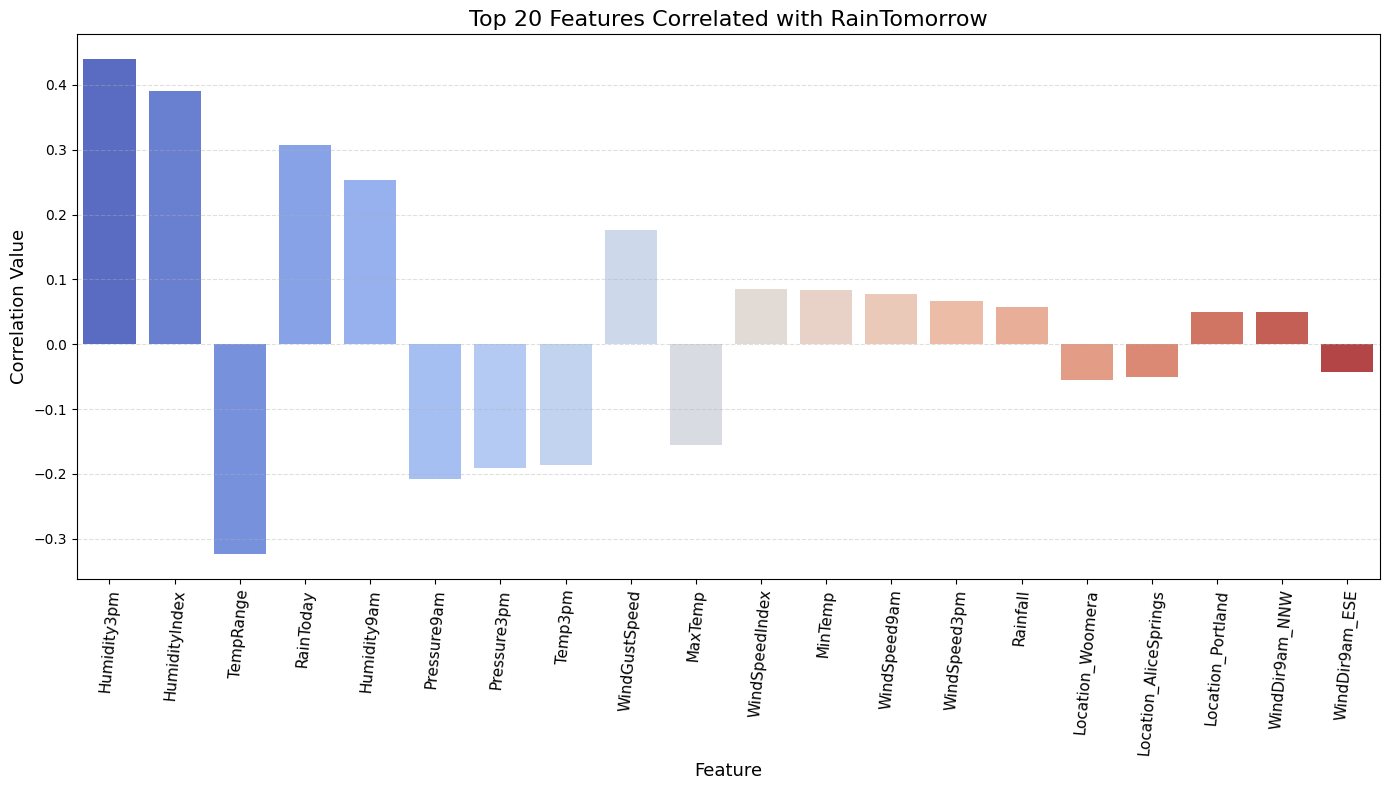

In [ ]:
correlations = df.corr()['RainTomorrow'] \
                 .drop('RainTomorrow') \
                 .sort_values(key=abs, ascending=False) \
                 .head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=correlations.index, y=correlations.values, palette="coolwarm")

plt.xticks(rotation=85, fontsize=11)
plt.ylabel("Correlation Value", fontsize=13)
plt.xlabel("Feature", fontsize=13)
plt.title("Top 20 Features Correlated with RainTomorrow", fontsize=16)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

spliting the data

In [ ]:
X = df[top_features]
y = df["RainTomorrow"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: RainTomorrow
0    88252
1    25502
Name: count, dtype: int64
After SMOTE: RainTomorrow
0    88252
1    88252
Name: count, dtype: int64


making grid search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def tune_and_evaluate(model, param_dist, X_train, y_train, X_test, y_test, cv=3, n_iter=50, threshold=0.5):

    # If the model has scale_pos_weight, calculate it automatically
    if hasattr(model, 'scale_pos_weight'):
        num_neg = np.sum(y_train == 0)
        num_pos = np.sum(y_train == 1)
        model.scale_pos_weight = num_neg / max(num_pos, 1)
        print(f"Auto scale_pos_weight set to: {model.scale_pos_weight:.2f}")

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='f1',
        cv=cv,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )
    # training
    random_search.fit(X_train, y_train)

    # Best model and parametersت
    best_model = random_search.best_estimator_
    print("\nBest Parameters:", random_search.best_params_)

    # Predicting probabilities if they exist
    if hasattr(best_model, "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_test)[:,1]
        y_pred = (y_pred_proba >= threshold).astype(int)
    else:
        y_pred = best_model.predict(X_test)

    # Evaluation
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    return best_model


XGBoost model

In [ ]:
from xgboost import XGBClassifier

# xgb_model = XGBClassifier(
#     objective='binary:logistic',
#     eval_metric='logloss',
#     random_state=42,
#     use_label_encoder=False
# )

# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [3, 4, 5, 6, 7],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'reg_lambda': [0, 1, 2, 5, 10],
#     'scale_pos_weight': [1]
# }

xgb6 = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,

    n_estimators=100,
    max_depth=7,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.9,
    reg_lambda=10,
    scale_pos_weight=1
)

xgb6.fit(X_train_resampled, y_train_resampled)

y_prob = xgb6.predict_proba(X_test)[:, 1]

threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

print("===== XGBoost Results =====")
print(f"Threshold used: {threshold}\n")

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

===== XGBoost Results =====
Threshold used: 0.5

Accuracy: 0.8367734449171912

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     22064
           1       0.65      0.58      0.61      6375

    accuracy                           0.84     28439
   macro avg       0.77      0.75      0.76     28439
weighted avg       0.83      0.84      0.83     28439

Confusion Matrix:
[[20101  1963]
 [ 2679  3696]]


showing the ROC Curve

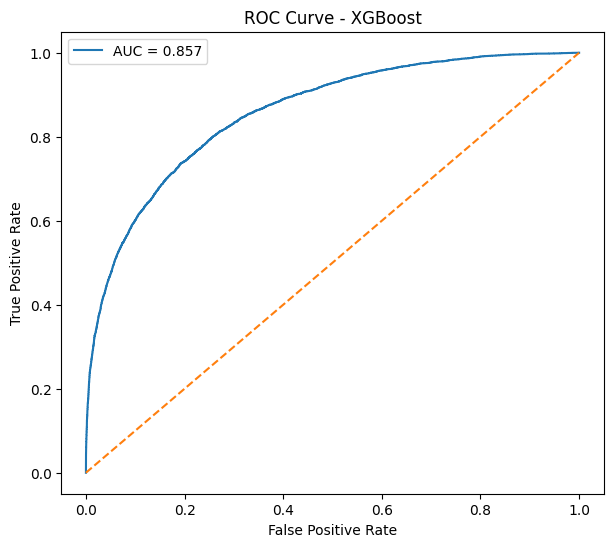

In [ ]:
from sklearn.metrics import roc_curve, auc
y_prob = xgb6.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

In [ ]:
from google.colab import files
files.download('/content/weatherAUS_cleaned_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>